In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
dt = pd.read_csv('WHR2023.csv')
data = dt.copy()
data

Country name  Ladder score  Standard error of ladder score  \
0             Finland         7.804                           0.036   
1             Denmark         7.586                           0.041   
2             Iceland         7.530                           0.049   
3              Israel         7.473                           0.032   
4         Netherlands         7.403                           0.029   
..                ...           ...                             ...   
132  Congo (Kinshasa)         3.207                           0.095   
133          Zimbabwe         3.204                           0.061   
134      Sierra Leone         3.138                           0.082   
135           Lebanon         2.392                           0.044   
136       Afghanistan         1.859                           0.033   

     upperwhisker  lowerwhisker  Logged GDP per capita  Social support  \
0           7.875         7.733                 10.792           0.969   
1           7.667         7.506                 10.962           0.954   
2           7.625         7.434                 10.896           0.983   
3           7.535         7.411                 10.639           0.943   
4           7.460         7.346                 10.942           0.930   
..            ...           ...                    ...             ...   
132         3.394         3.020                  7.007           0.652   
133         3.323         3.084                  7.641           0.690   
134         3.299         2.976                  7.394           0.555   
135         2.479         2.305                  9.478           0.530   
136         1.923         1.795                  7.324           0.341   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     71.150                         0.961      -0.019   
1                     71.250                         0.934       0.134   
2                     72.050                         0.936       0.211   
3                     72.697                         0.809      -0.023   
4                     71.550                         0.887       0.213   
..                       ...                           ...         ...   
132                   55.375                         0.664       0.086   
133                   54.050                         0.654      -0.046   
134                   54.900                         0.660       0.105   
135                   66.149                         0.474      -0.141   
136                   54.712                         0.382      -0.081   

     Perceptions of corruption  Ladder score in Dystopia  \
0                        0.182                     1.778   
1                        0.196                     1.778   
2                        0.668                     1.778   
3                        0.708                     1.778   
4                        0.379                     1.778   
..                         ...                       ...   
132                      0.834                     1.778   
133                      0.766                     1.778   
134                      0.858                     1.778   
135                      0.891                     1.778   
136                      0.847                     1.778   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134               

In [3]:
dt.describe()

Ladder score  Standard error of ladder score  upperwhisker  \
count    137.000000                      137.000000    137.000000   
mean       5.539796                        0.064715      5.666526   
std        1.139929                        0.023031      1.117421   
min        1.859000                        0.029000      1.923000   
25%        4.724000                        0.047000      4.980000   
50%        5.684000                        0.060000      5.797000   
75%        6.334000                        0.077000      6.441000   
max        7.804000                        0.147000      7.875000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    137.000000             137.000000      137.000000   
mean       5.412971               9.449796        0.799073   
std        1.163724               1.207302        0.129222   
min        1.795000               5.527000        0.341000   
25%        4.496000               8.591000        0.722000   
50%        5.529000               9.567000        0.827000   
75%        6.243000              10.540000        0.896000   
max        7.733000              11.660000        0.983000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               136.000000                    137.000000  137.000000   
mean                 64.967632                      0.787394    0.022431   
std                   5.750390                      0.112371    0.141707   
min                  51.530000                      0.382000   -0.254000   
25%                  60.648500                      0.724000   -0.074000   
50%                  65.837500                      0.801000    0.001000   
75%                  69.412500                      0.874000    0.117000   
max                  77.280000                      0.961000    0.531000   

       Perceptions of corruption  Ladder score in Dystopia  \
count                 137.000000                   137.000   
mean                    0.725401                     1.778   
std                     0.176956                     0.000   
min                     0.146000                     1.778   
25%                     0.668000                     1.778   
50%                     0.774000                     1.778   
75%                     0.846000                     1.778   
max                     0.929000                     1.778   

       Explained by: Log GDP per capita  Explained by: Social support  \
count                        137.000000                    137.000000   
mean                           1.406985                      1.156212   
std                            0.432963                      0.326322   
min                            0.000000                      0.000000   
25%                            1.099000                      0.962000   
50%                            1.449000                      1.227000   
75%                            1.798000                      1.401000   
max                            2.200000                      1.620000   

       Explained by: Healthy life expectancy  \
count                             136.000000   
mean                                0.366176   
std                                 0.156691   
min                                 0.000000   
25%                                 0.248500   
50%                                 0.389500   
75%                                 0.487500   
max                                 0.702000   

       Explained by: Freedom to make life choices  Explained by: Generosity  \
count                                  137.000000                137.000000   
mean                                     0.540000                  0.148474   
std                                      0.149501                  0.076053   
min                                      0.000000                  0.000000   
25%                                      0.455000                  0.097000   
50%              

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

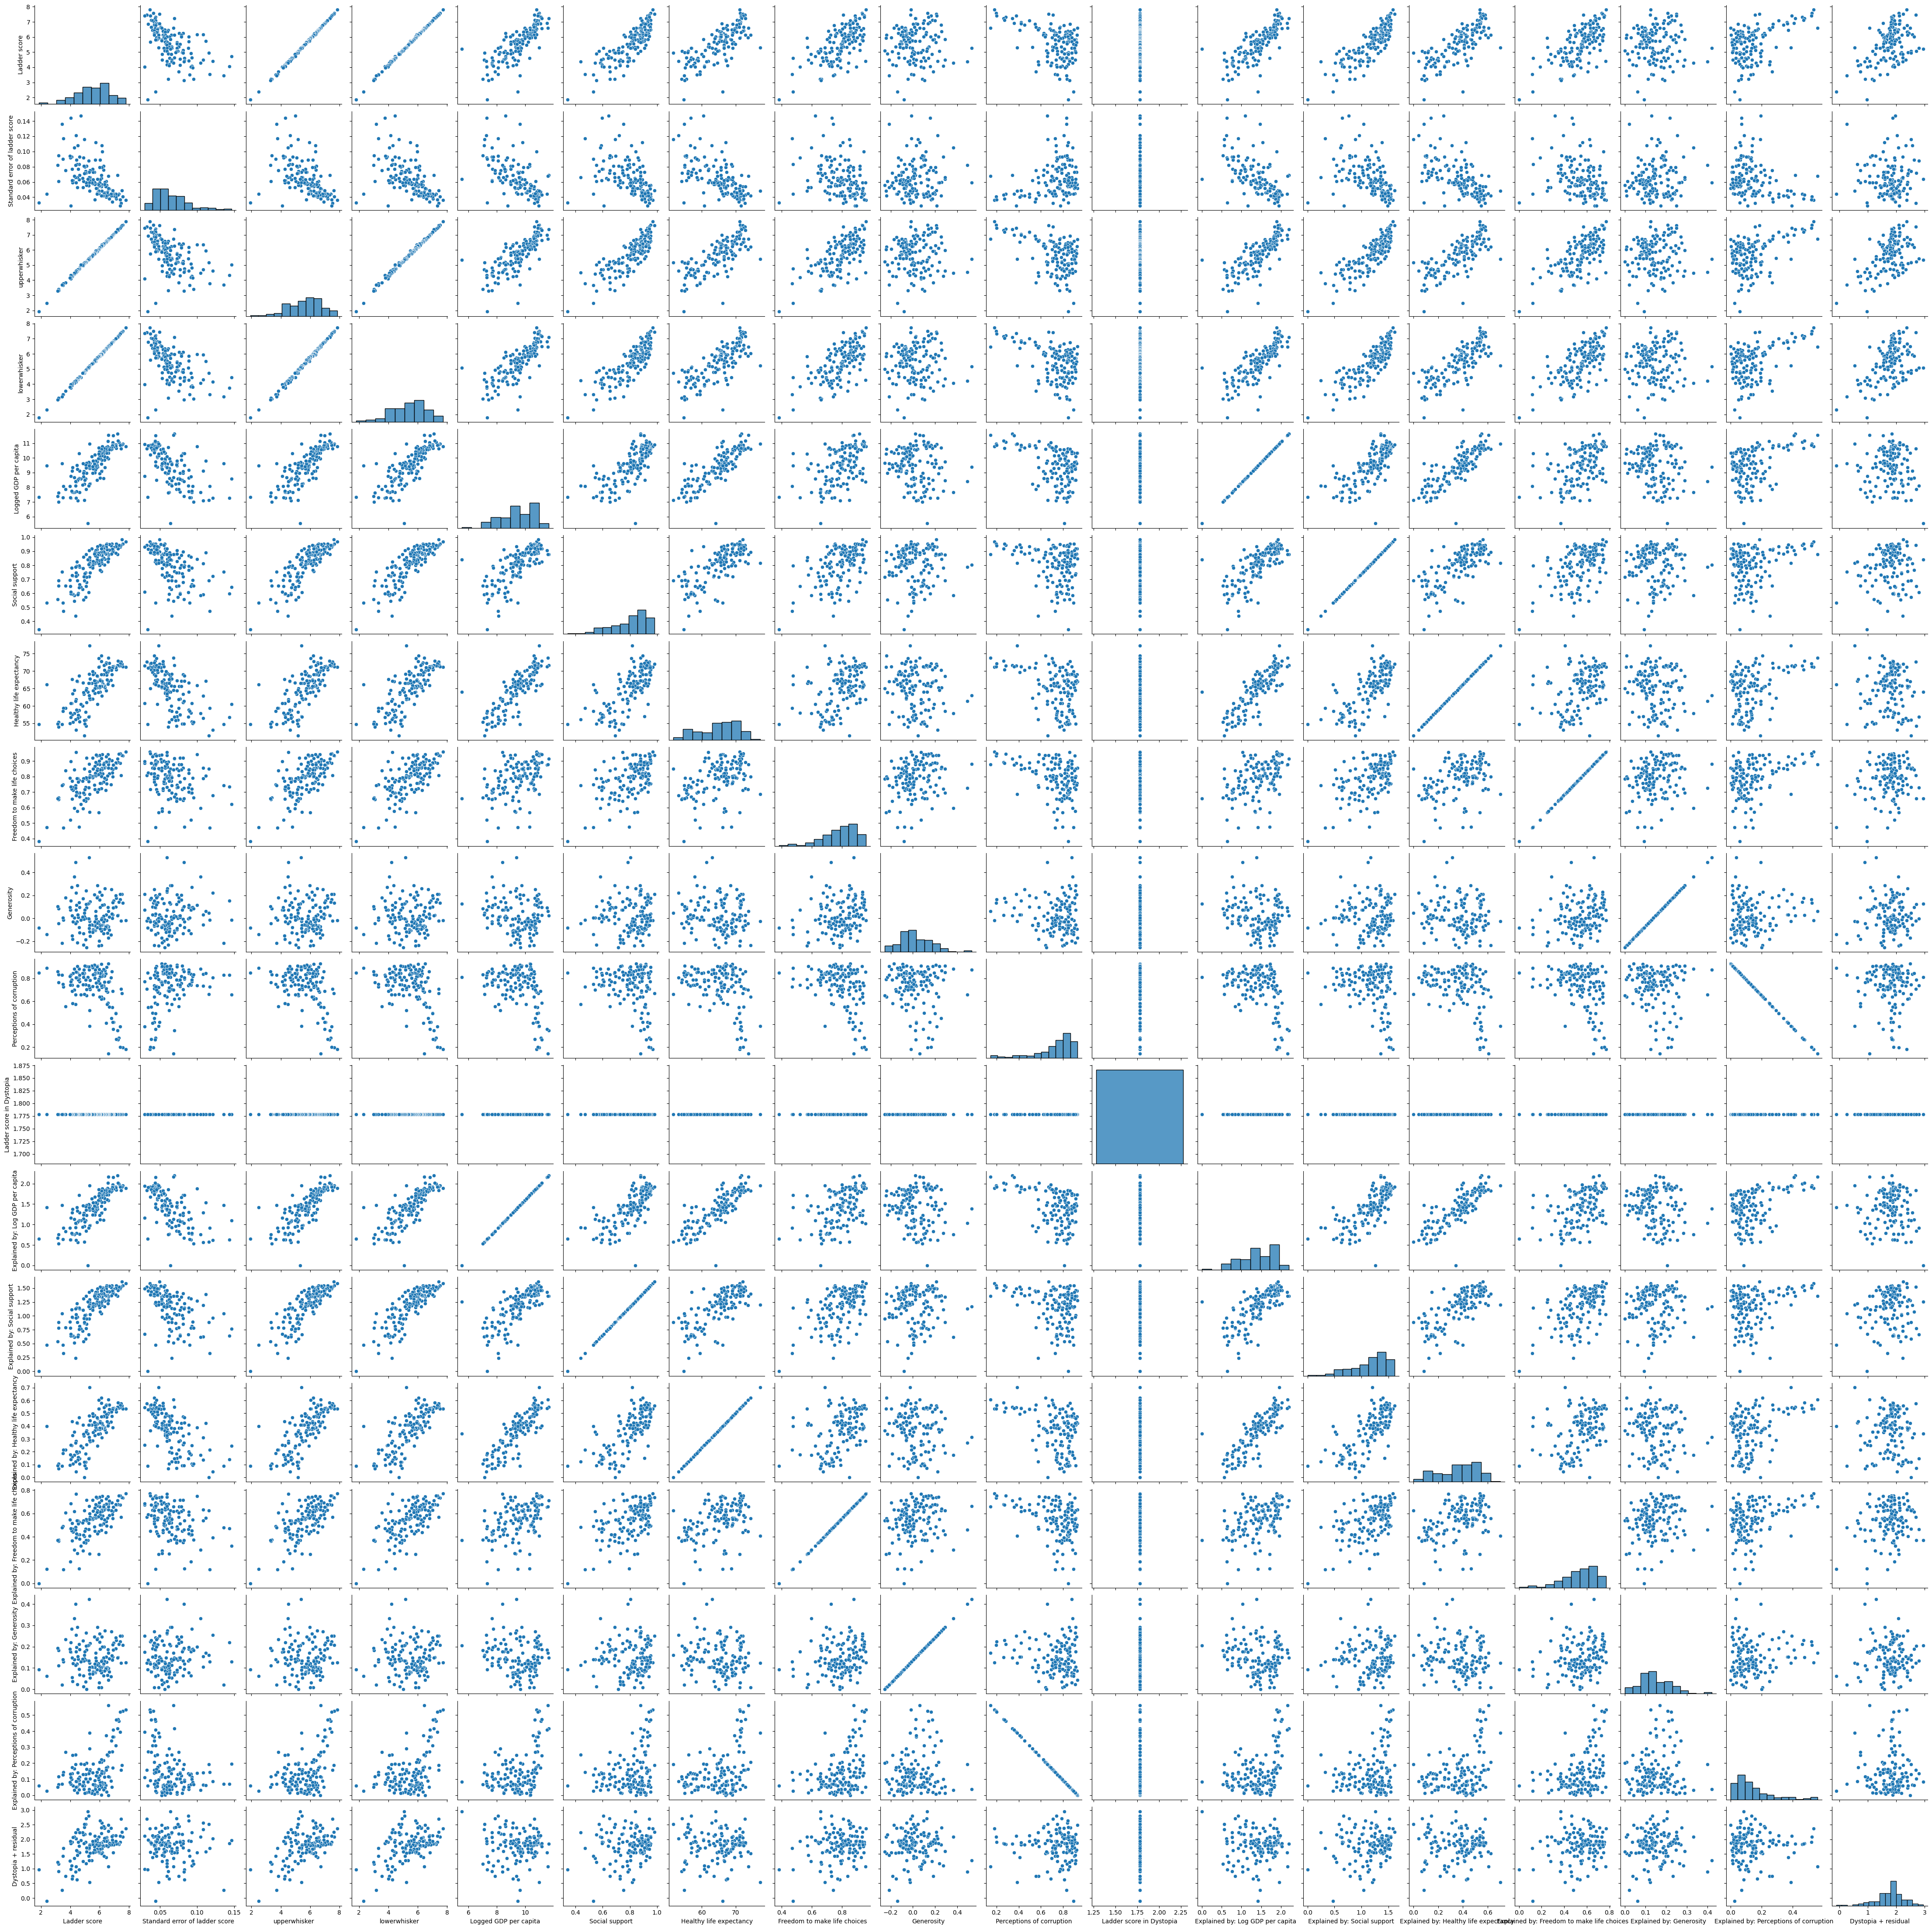

In [5]:
sns.pairplot(dt)

In [6]:
dt_new = dt.iloc[:,[1,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
dt_new

Ladder score  Logged GDP per capita  Social support  \
0           7.804                 10.792           0.969   
1           7.586                 10.962           0.954   
2           7.530                 10.896           0.983   
3           7.473                 10.639           0.943   
4           7.403                 10.942           0.930   
..            ...                    ...             ...   
132         3.207                  7.007           0.652   
133         3.204                  7.641           0.690   
134         3.138                  7.394           0.555   
135         2.392                  9.478           0.530   
136         1.859                  7.324           0.341   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                     71.150                         0.961      -0.019   
1                     71.250                         0.934       0.134   
2                     72.050                         0.936       0.211   
3                     72.697                         0.809      -0.023   
4                     71.550                         0.887       0.213   
..                       ...                           ...         ...   
132                   55.375                         0.664       0.086   
133                   54.050                         0.654      -0.046   
134                   54.900                         0.660       0.105   
135                   66.149                         0.474      -0.141   
136                   54.712                         0.382      -0.081   

     Perceptions of corruption  Ladder score in Dystopia  \
0                        0.182                     1.778   
1                        0.196                     1.778   
2                        0.668                     1.778   
3                        0.708                     1.778   
4                        0.379                     1.778   
..                         ...                       ...   
132                      0.834                     1.778   
133                      0.766                     1.778   
134                      0.858                     1.778   
135                      0.891                     1.778   
136                      0.847                     1.778   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134                             0.670                         0.540   
135                             1.417                         0.476   
136                             0.645                         0.000   

     Explained by: Healthy life expectancy  \
0                                    0.535   
1                                    0.537   
2                                    0.559   
3                                    0.577   
4                                    0.545   
..                                     ...   
132                                  0.105   
133                                  0.069   
134                                  0.092   
135                                  0.398   
136                                  0.087   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         0.772                     0.126   
1                                         0.734                     0.208   
2                                    

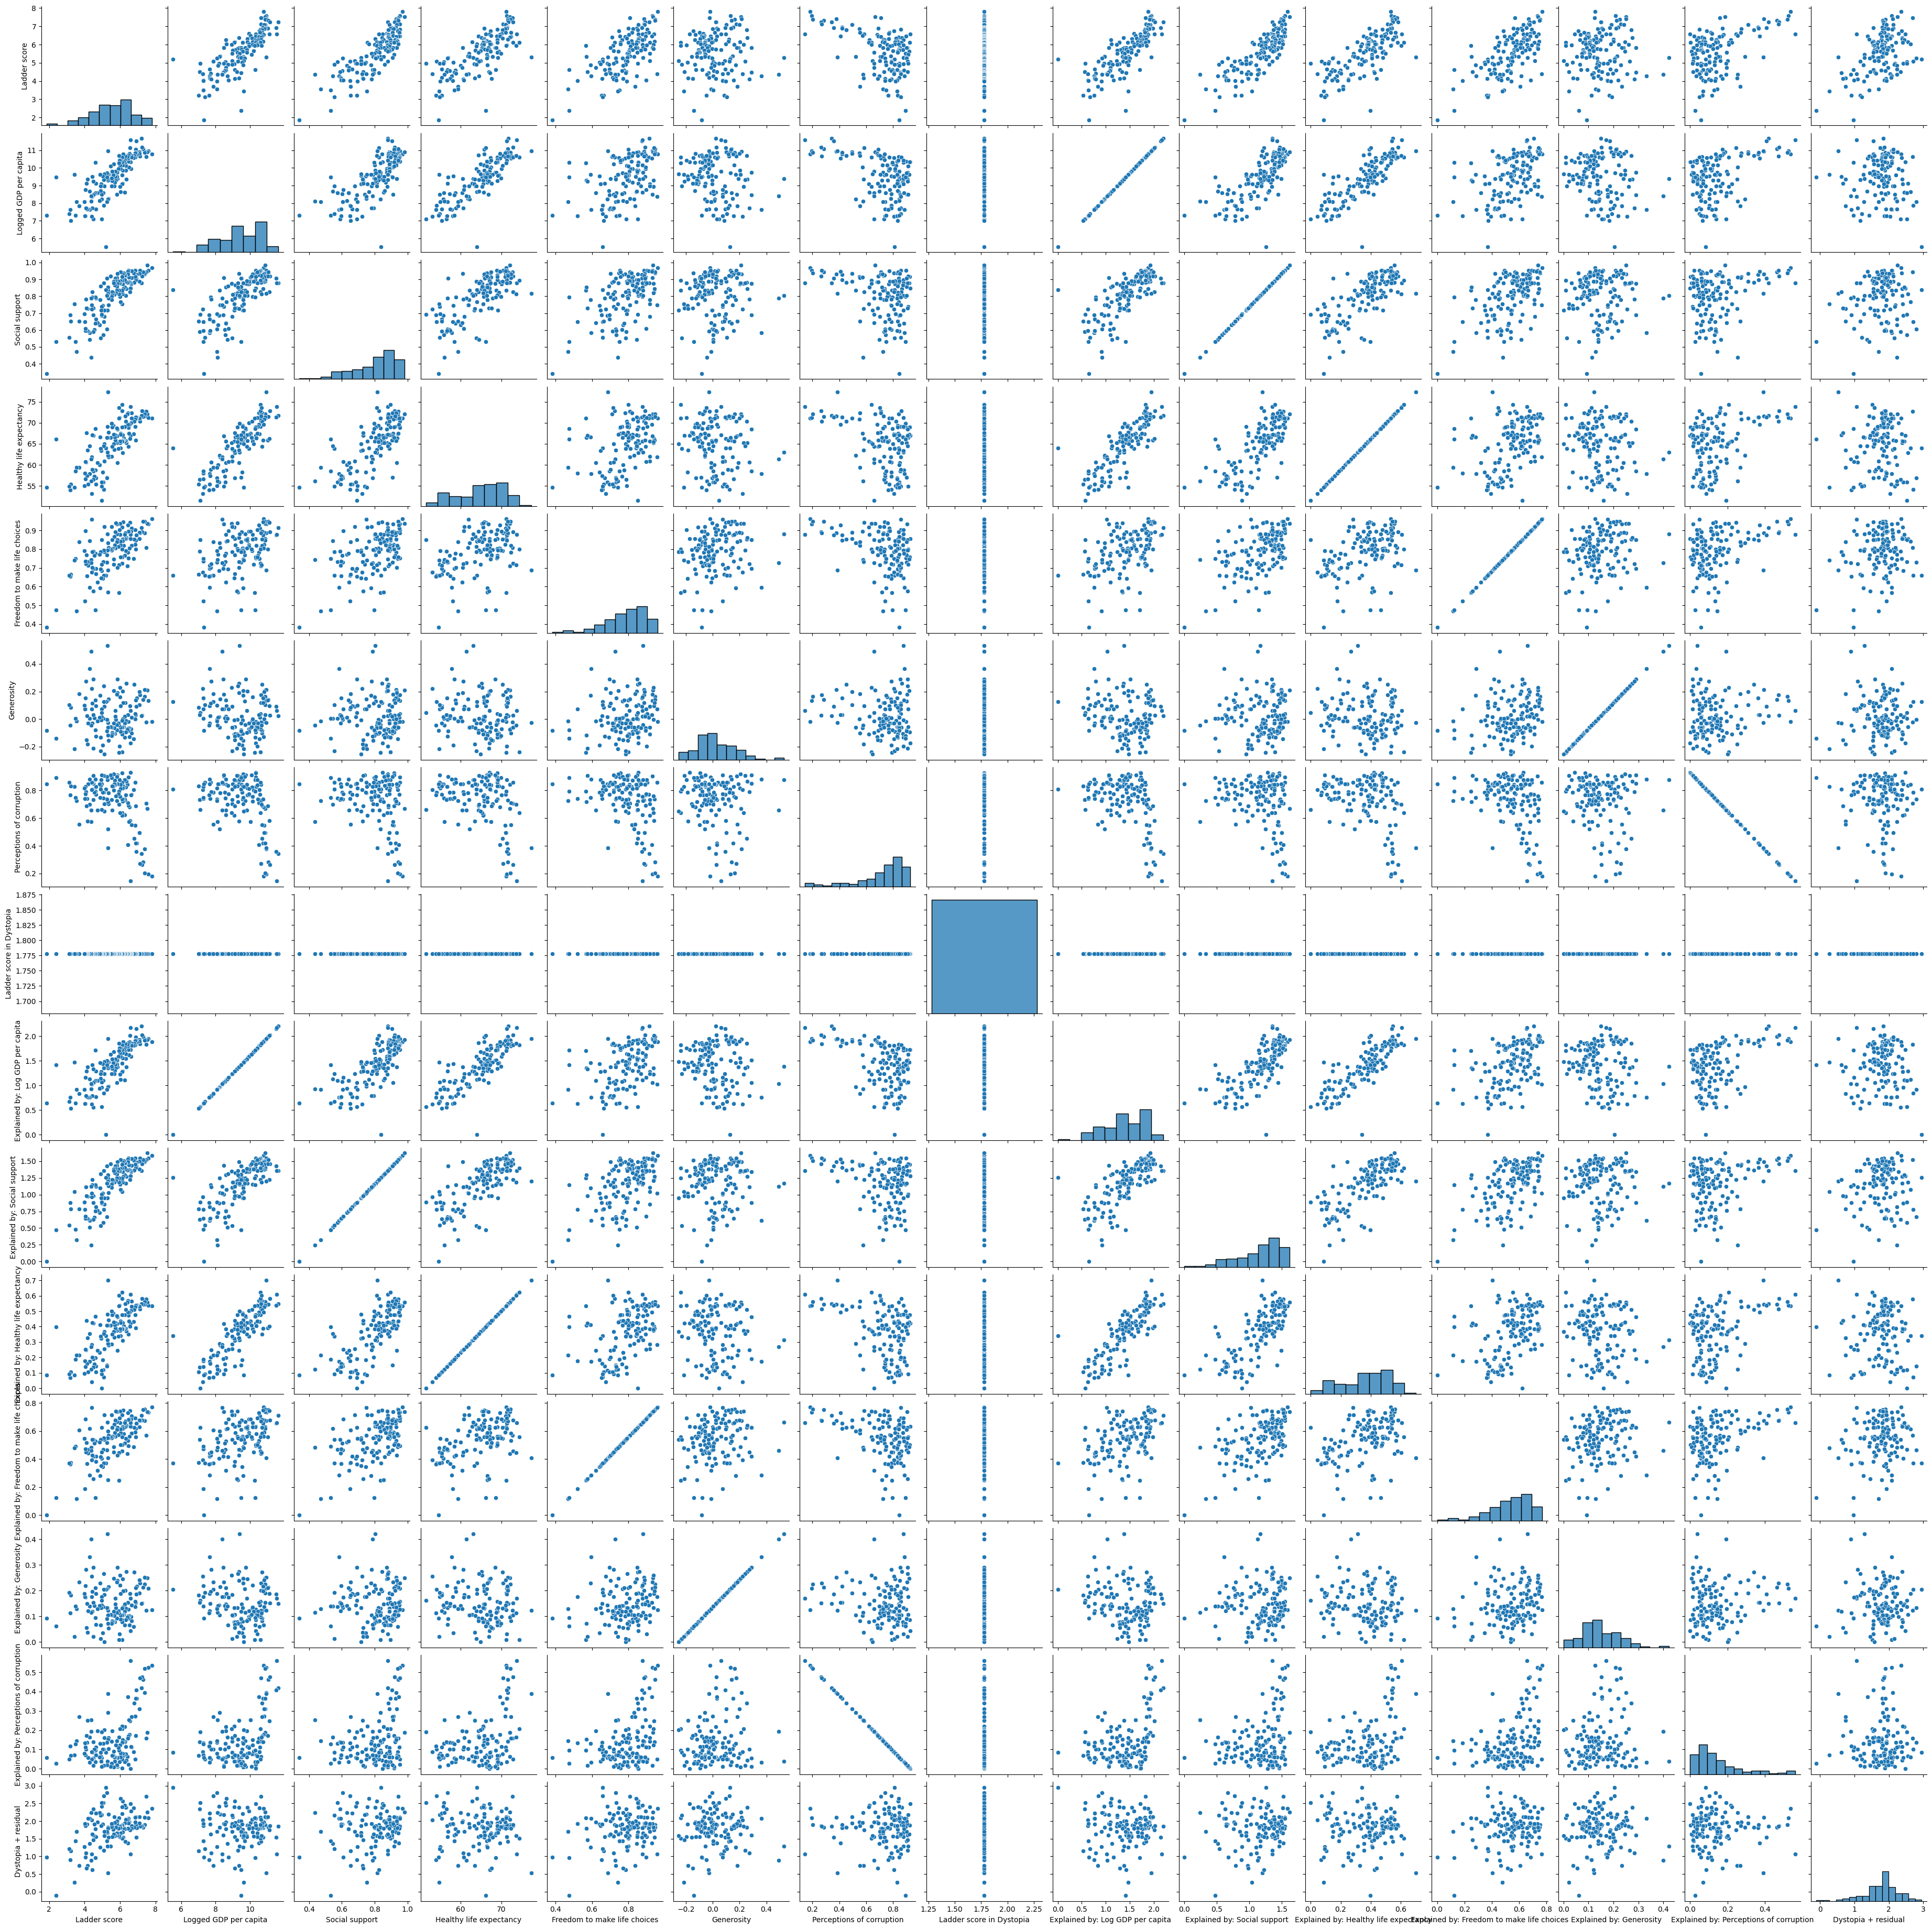

In [7]:
sns.pairplot(dt_new)

In [8]:
covariance_matrix = np.cov(dt_new.T)
covariance_matrix = pd.DataFrame(covariance_matrix)
covariance_matrix

0         1         2   3         4         5         6    7   \
0   1.299438  1.079477  0.122930 NaN  0.084917  0.007121 -0.095192  0.0   
1   1.079477  1.457579  0.115146 NaN  0.061245 -0.026767 -0.093352  0.0   
2   0.122930  0.115146  0.016698 NaN  0.007865  0.000670 -0.006231  0.0   
3        NaN       NaN       NaN NaN       NaN       NaN       NaN  NaN   
4   0.084917  0.061245  0.007865 NaN  0.012627  0.002711 -0.007631  0.0   
5   0.007121 -0.026767  0.000670 NaN  0.002711  0.020081 -0.003076  0.0   
6  -0.095192 -0.093352 -0.006231 NaN -0.007631 -0.003076  0.031313  0.0   
7   0.000000  0.000000  0.000000 NaN  0.000000  0.000000  0.000000  0.0   
8   0.387109  0.522717  0.041288 NaN  0.021961 -0.009596 -0.033476  0.0   
9   0.310460  0.290787  0.042168 NaN  0.019860  0.001681 -0.015744  0.0   
10       NaN       NaN       NaN NaN       NaN       NaN       NaN  NaN   
11  0.112973  0.081485  0.010468 NaN  0.016800  0.003606 -0.010153  0.0   
12  0.003787 -0.014400  0.000353 NaN  0.001450  0.010777 -0.001642  0.0   
13  0.068170  0.066859  0.004460 NaN  0.005463  0.002197 -0.022424  0.0   
14       NaN       NaN       NaN NaN       NaN       NaN       NaN  NaN   

          8         9   10        11        12        13  14  
0   0.387109  0.310460 NaN  0.112973  0.003787  0.068170 NaN  
1   0.522717  0.290787 NaN  0.081485 -0.014400  0.066859 NaN  
2   0.041288  0.042168 NaN  0.010468  0.000353  0.004460 NaN  
3        NaN       NaN NaN       NaN       NaN       NaN NaN  
4   0.021961  0.019860 NaN  0.016800  0.001450  0.005463 NaN  
5  -0.009596  0.001681 NaN  0.003606  0.010777  0.002197 NaN  
6  -0.033476 -0.015744 NaN -0.010153 -0.001642 -0.022424 NaN  
7   0.000000  0.000000 NaN  0.000000  0.000000  0.000000 NaN  
8   0.187457  0.104268 NaN  0.029219 -0.005163  0.023975 NaN  
9   0.104268  0.106486 NaN  0.026434  0.000887  0.011270 NaN  
10       NaN       NaN NaN       NaN       NaN       NaN NaN  
11  0.029219  0.026434 NaN  0.022351  0.001929  0.007269 NaN  
12 -0.005163  0.000887 NaN  0.001929  0.005784  0.001173 NaN  
13  0.023975  0.011270 NaN  0.007269  0.001173  0.016059 NaN  
14       NaN       NaN NaN       NaN       NaN       NaN NaN

In [9]:
dt_new = dt_new.iloc[:,[0,1,2,4,5,8,9,11,12]]
dt_new

Ladder score  Logged GDP per capita  Social support  \
0           7.804                 10.792           0.969   
1           7.586                 10.962           0.954   
2           7.530                 10.896           0.983   
3           7.473                 10.639           0.943   
4           7.403                 10.942           0.930   
..            ...                    ...             ...   
132         3.207                  7.007           0.652   
133         3.204                  7.641           0.690   
134         3.138                  7.394           0.555   
135         2.392                  9.478           0.530   
136         1.859                  7.324           0.341   

     Freedom to make life choices  Generosity  \
0                           0.961      -0.019   
1                           0.934       0.134   
2                           0.936       0.211   
3                           0.809      -0.023   
4                           0.887       0.213   
..                            ...         ...   
132                         0.664       0.086   
133                         0.654      -0.046   
134                         0.660       0.105   
135                         0.474      -0.141   
136                         0.382      -0.081   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134                             0.670                         0.540   
135                             1.417                         0.476   
136                             0.645                         0.000   

     Explained by: Freedom to make life choices  Explained by: Generosity  
0                                         0.772                     0.126  
1                                         0.734                     0.208  
2                                         0.738                     0.250  
3                                         0.569                     0.124  
4                                         0.672                     0.251  
..                                          ...                       ...  
132                                       0.375                     0.183  
133                                       0.363                     0.112  
134                                       0.371                     0.193  
135                                       0.123                     0.061  
136                                       0.000                     0.093  

[137 rows x 9 columns]

In [11]:
scaler = StandardScaler()

In [12]:
scaled_dt = scaler.fit_transform(dt_new.values)
scaled_dt = pd.DataFrame(scaled_dt)
scaled_dt

0         1         2         3         4         5         6  \
0    1.993557  1.115818  1.319824  1.550602 -0.293442  1.115061  1.318824   
1    1.801616  1.257145  1.203319  1.309445  0.790215  1.256468  1.205023   
2    1.752309  1.202277  1.428562  1.327309  1.335585  1.203150  1.426473   
3    1.702123  0.988624  1.117882  0.192978 -0.321773  0.987563  1.121979   
4    1.640490  1.240518  1.016911  0.889654  1.349751  1.240241  1.020481   
..        ...       ...       ...       ...       ...       ...       ...   
132 -2.053950 -2.030775 -1.142317 -1.102125  0.450244 -2.030660 -1.144811   
133 -2.056591 -1.503711 -0.847171 -1.191442 -0.484676 -1.504441 -0.846468   
134 -2.114702 -1.709050 -1.895717 -1.137852  0.584816 -1.708438 -1.895282   
135 -2.771530  0.023447 -2.089892 -2.799155 -1.157535  0.023215 -2.092126   
136 -3.240819 -1.767243 -3.557856 -3.620875 -0.732571 -1.766392 -3.556159   

            7         8  
0    1.557520 -0.296593  
1    1.302409  0.785552  
2    1.329263  1.339822  
3    0.194690 -0.322987  
4    0.886175  1.353019  
..        ...       ...  
132 -1.107719  0.455630  
133 -1.188281 -0.481349  
134 -1.134573  0.587599  
135 -2.799509 -1.154391  
136 -3.625263 -0.732090  

[137 rows x 9 columns]

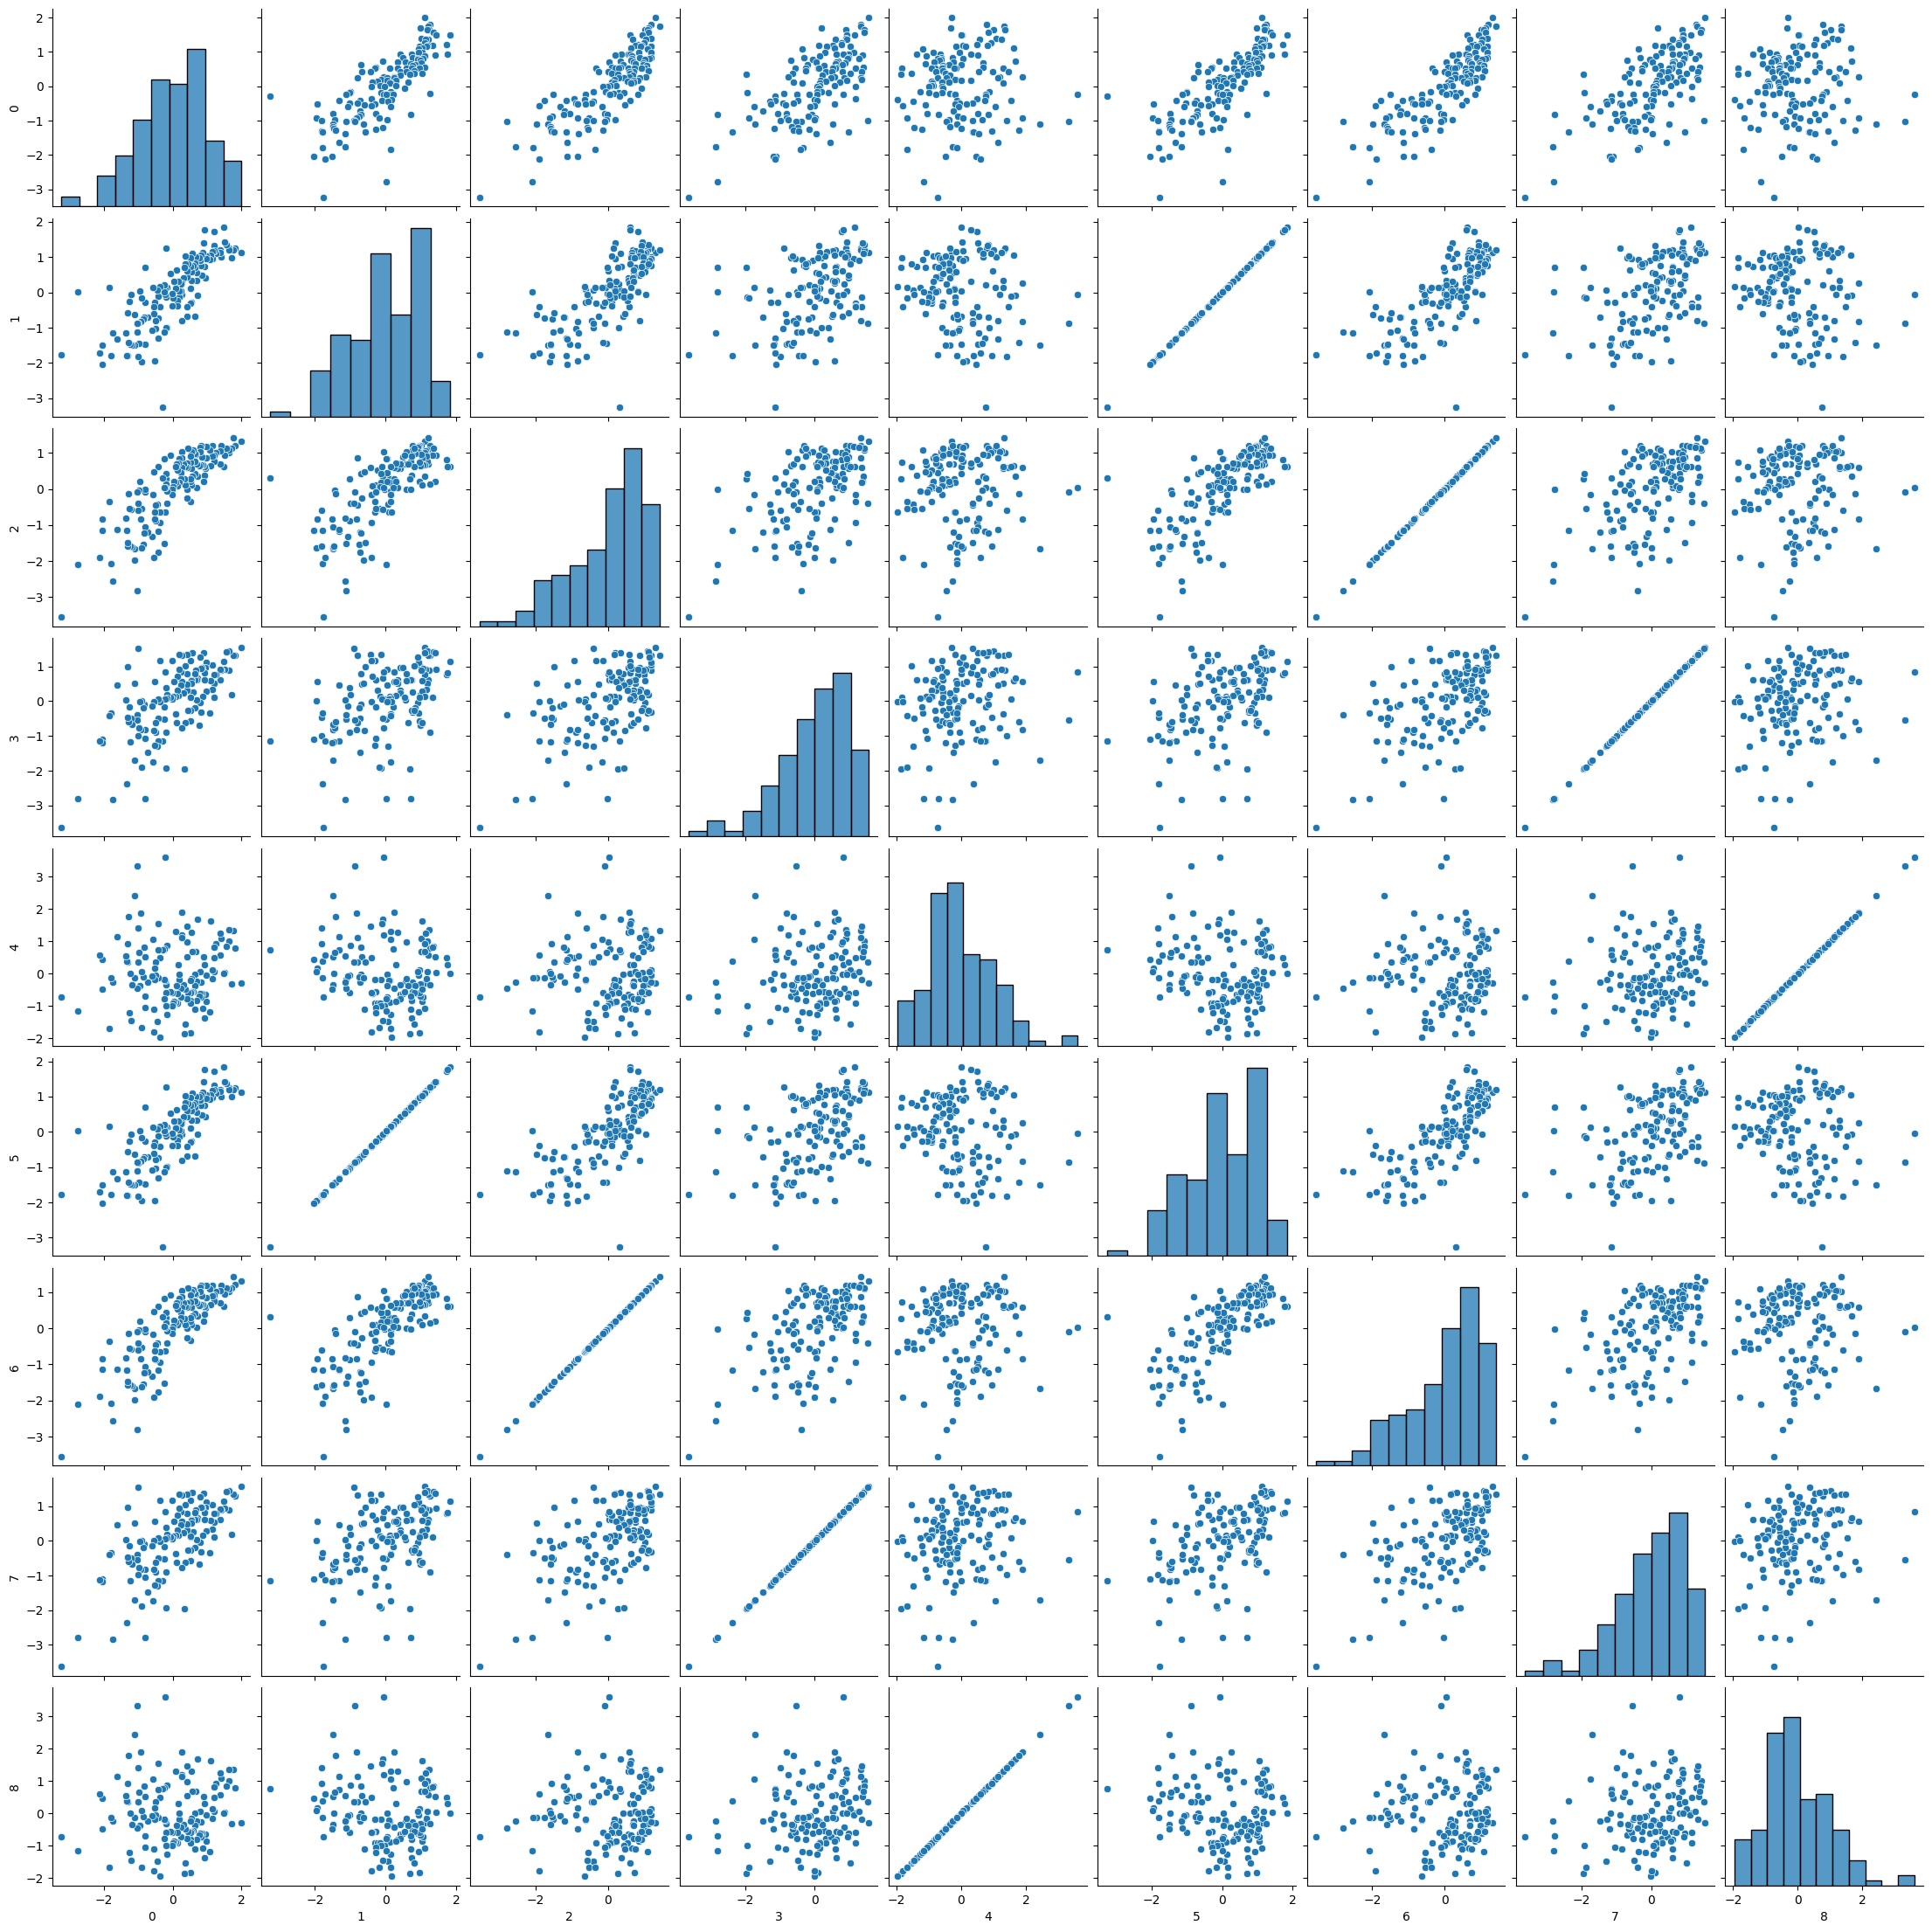

In [13]:
sns.pairplot(scaled_dt)

In [14]:
covariance_matrix = np.cov(scaled_dt.T)
covariance_matrix = pd.DataFrame(covariance_matrix)
covariance_matrix

0         1         2         3         4         5         6  \
0  1.007353  0.790135  0.840668  0.667799  0.044406  0.790109  0.840741   
1  0.790135  1.007353  0.743496  0.454758 -0.157606  1.007353  0.743522   
2  0.840668  0.743496  1.007353  0.545613  0.036843  0.743393  1.007350   
3  0.667799  0.454758  0.545613  1.007353  0.171481  0.454708  0.545575   
4  0.044406 -0.157606  0.036843  0.171481  1.007353 -0.157555  0.036617   
5  0.790109  1.007353  0.743393  0.454708 -0.157555  1.007353  0.743419   
6  0.840741  0.743522  1.007350  0.545575  0.036617  0.743419  1.007353   
7  0.667783  0.454775  0.545853  1.007347  0.171482  0.454724  0.545816   
8  0.044001 -0.157984  0.036225  0.170933  1.007343 -0.157933  0.035999   

          7         8  
0  0.667783  0.044001  
1  0.454775 -0.157984  
2  0.545853  0.036225  
3  1.007347  0.170933  
4  0.171482  1.007343  
5  0.454724 -0.157933  
6  0.545816  0.035999  
7  1.007353  0.170933  
8  0.170933  1.007353

In [15]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([5.20517666e+00, 2.21177279e+00, 1.01639512e+00, 4.75269140e-01,
       1.57543816e-01, 9.95692606e-06, 5.68217500e-06, 3.10115956e-06,
       2.08183694e-07])

In [16]:
eigen_vectors

array([[ 4.09776900e-01,  6.79487017e-03, -4.55140539e-02,
        -3.32531061e-02, -9.10416842e-01, -5.36953553e-04,
        -3.84332452e-04, -3.86352131e-04,  1.07618667e-04],
       [ 3.81359632e-01, -1.87444262e-01, -2.33130161e-01,
         4.87905710e-01,  1.64171666e-01, -2.59916151e-04,
        -1.18968793e-02,  3.05635764e-03,  7.07053425e-01],
       [ 3.99776811e-01, -1.51175506e-02, -2.24505919e-01,
        -4.95757653e-01,  2.09397818e-01,  1.94972588e-02,
         1.06454316e-01, -6.98705771e-01,  4.64081021e-03],
       [ 3.32590238e-01,  2.03970025e-01,  5.74923166e-01,
         5.27654585e-02,  1.20188176e-01,  4.16527442e-02,
         6.97602553e-01,  1.07255365e-01,  1.12222040e-02],
       [ 1.29124429e-02,  6.50408948e-01, -2.52397557e-01,
         1.12550580e-01,  1.95763299e-02, -7.05665606e-01,
         4.38576537e-02, -1.25824245e-02,  5.63635081e-04],
       [ 3.81335600e-01, -1.87422320e-01, -2.33166540e-01,
         4.88134839e-01,  1.63979556e-01,  2.537456

In [17]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

variance_explained

[57.41314073012559,
 24.395871865066727,
 11.2108463661588,
 5.242222470835577,
 1.7377095663189097,
 0.0001098249751636504,
 6.2674436361224e-05,
 3.420581505171704e-05,
 2.2962678304263205e-06]

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(scaled_dt)

PCA(n_components=5)

In [19]:
pca.explained_variance_ratio_

array([0.57413141, 0.24395872, 0.11210846, 0.05242222, 0.0173771 ])

In [20]:
reduced_scaled = pca.transform(scaled_dt)
reduced_scaled

array([[ 3.74877619e+00, -1.94475032e-01,  7.32543466e-01,
         1.89053703e-01,  5.33566277e-01],
       [ 3.54850018e+00,  1.06212786e+00, -1.05039915e-01,
        -2.87641252e-01,  3.79046522e-01],
       [ 3.69455070e+00,  1.79960526e+00, -4.29772961e-01,
        -1.41362354e-01,  2.32070201e-01],
       [ 2.46725169e+00, -7.33136592e-01, -6.55373151e-01,
         2.55023412e-01,  7.22495664e-01],
       [ 3.05798736e+00,  1.63529870e+00, -7.71920712e-01,
        -5.44043087e-01,  3.94595976e-01],
       [ 3.42841527e+00,  1.43061465e+00,  2.24413420e-02,
        -4.08891478e-01,  2.56430012e-01],
       [ 3.54321776e+00,  1.13878948e+00,  5.26918848e-03,
        -5.05124744e-01,  1.32225474e-01],
       [ 3.07005122e+00, -1.32316270e-01, -1.07467288e-01,
        -5.12651345e-01,  2.76789619e-01],
       [ 3.26482112e+00, -2.20670144e-01,  1.04099991e-01,
        -1.25230155e+00,  2.15766631e-01],
       [ 2.90998092e+00,  1.36019483e+00, -5.91481268e-01,
        -9.38003381e-02

In [21]:
dt_new['pca_1'] = reduced_scaled[:,0]
dt_new

C:\Users\ancap\AppData\Local\Temp\ipykernel_2272\65582444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_new['pca_1'] = reduced_scaled[:,0]


Ladder score  Logged GDP per capita  Social support  \
0           7.804                 10.792           0.969   
1           7.586                 10.962           0.954   
2           7.530                 10.896           0.983   
3           7.473                 10.639           0.943   
4           7.403                 10.942           0.930   
..            ...                    ...             ...   
132         3.207                  7.007           0.652   
133         3.204                  7.641           0.690   
134         3.138                  7.394           0.555   
135         2.392                  9.478           0.530   
136         1.859                  7.324           0.341   

     Freedom to make life choices  Generosity  \
0                           0.961      -0.019   
1                           0.934       0.134   
2                           0.936       0.211   
3                           0.809      -0.023   
4                           0.887       0.213   
..                            ...         ...   
132                         0.664       0.086   
133                         0.654      -0.046   
134                         0.660       0.105   
135                         0.474      -0.141   
136                         0.382      -0.081   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134                             0.670                         0.540   
135                             1.417                         0.476   
136                             0.645                         0.000   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         0.772                     0.126   
1                                         0.734                     0.208   
2                                         0.738                     0.250   
3                                         0.569                     0.124   
4                                         0.672                     0.251   
..                                          ...                       ...   
132                                       0.375                     0.183   
133                                       0.363                     0.112   
134                                       0.371                     0.193   
135                                       0.123                     0.061   
136                                       0.000                     0.093   

        pca_1  
0    3.748776  
1    3.548500  
2    3.694551  
3    2.467252  
4    3.057987  
..        ...  
132 -4.028258  
133 -3.470846  
134 -4.426206  
135 -4.681525  
136 -7.948448  

[137 rows x 10 columns]

In [22]:
dt_new['pca_2'] = reduced_scaled[:,1]
dt_new['pca_3'] = reduced_scaled[:,2]
dt_new['pca_4'] = reduced_scaled[:,3]
dt_new['pca_5'] = reduced_scaled[:,4]
dt_new

C:\Users\ancap\AppData\Local\Temp\ipykernel_2272\2878303570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_new['pca_2'] = reduced_scaled[:,1]
C:\Users\ancap\AppData\Local\Temp\ipykernel_2272\2878303570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_new['pca_3'] = reduced_scaled[:,2]
C:\Users\ancap\AppData\Local\Temp\ipykernel_2272\2878303570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Ladder score  Logged GDP per capita  Social support  \
0           7.804                 10.792           0.969   
1           7.586                 10.962           0.954   
2           7.530                 10.896           0.983   
3           7.473                 10.639           0.943   
4           7.403                 10.942           0.930   
..            ...                    ...             ...   
132         3.207                  7.007           0.652   
133         3.204                  7.641           0.690   
134         3.138                  7.394           0.555   
135         2.392                  9.478           0.530   
136         1.859                  7.324           0.341   

     Freedom to make life choices  Generosity  \
0                           0.961      -0.019   
1                           0.934       0.134   
2                           0.936       0.211   
3                           0.809      -0.023   
4                           0.887       0.213   
..                            ...         ...   
132                         0.664       0.086   
133                         0.654      -0.046   
134                         0.660       0.105   
135                         0.474      -0.141   
136                         0.382      -0.081   

     Explained by: Log GDP per capita  Explained by: Social support  \
0                               1.888                         1.585   
1                               1.949                         1.548   
2                               1.926                         1.620   
3                               1.833                         1.521   
4                               1.942                         1.488   
..                                ...                           ...   
132                             0.531                         0.784   
133                             0.758                         0.881   
134                             0.670                         0.540   
135                             1.417                         0.476   
136                             0.645                         0.000   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         0.772                     0.126   
1                                         0.734                     0.208   
2                                         0.738                     0.250   
3                                         0.569                     0.124   
4                                         0.672                     0.251   
..                                          ...                       ...   
132                                       0.375                     0.183   
133                                       0.363                     0.112   
134                                       0.371                     0.193   
135                                       0.123                     0.061   
136                                       0.000                     0.093   

        pca_1     pca_2     pca_3     pca_4     pca_5  
0    3.748776 -0.194475  0.732543  0.189054  0.533566  
1    3.548500  1.062128 -0.105040 -0.287641  0.379047  
2    3.694551  1.799605 -0.429773 -0.141362  0.232070  
3    2.467252 -0.733137 -0.655373  0.255023  0.722496  
4    3.057987  1.635299 -0.771921 -0.544043  0.394596  
..        ...       ...       ...       ...       ...  
132 -4.028258  0.920472  0.054736  0.793764 -0.476065  
133 -3.470846 -0.538103  0.051010  0.793902 -0.719165  
134 -4.426206  0.982797  0.141682 -0.294886 -0.320039  
135 -4.681525 -2.609662 -1.580740 -1.633538 -0.936980  
136 -7.948448 -1.682223 -1.227460 -1.364536  0.018904  

[137 rows x 14 columns]

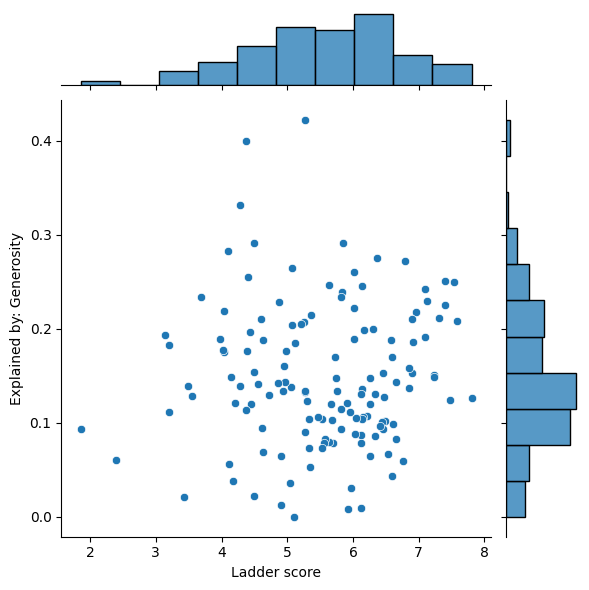

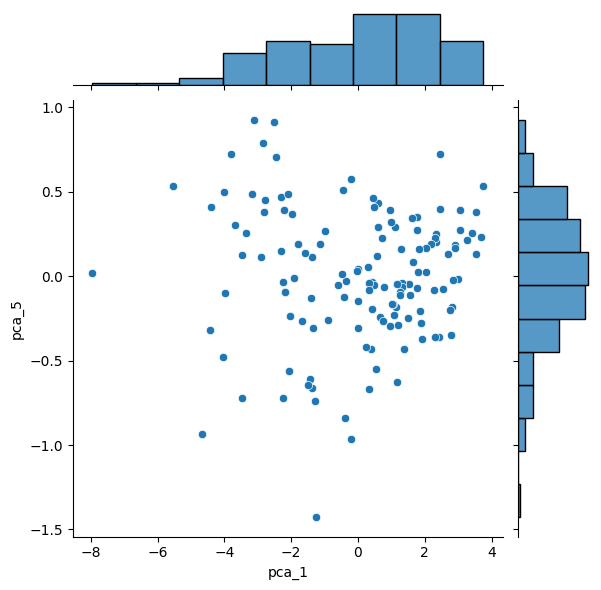

In [23]:
#Comparacion de resultados
sns.jointplot(x=dt_new['Ladder score'], y=dt_new['Explained by: Generosity'])
sns.jointplot(x=dt_new['pca_1'], y=dt_new['pca_5'])